In [2]:
#import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql
import folium
import gmaps

%matplotlib inline


In [17]:
#2.	Read in police call data for 2016 to a data frame called police_2013 and look at the first 5 rows. 
    #Look at the last five rows of police_2016.


police_2016 = pd.read_csv('Metro_Nashville_Davidson_County_Calls_For_Police_Service__2016_.csv')
police_2016

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201600000001,01/01/2016 12:00:00 AM,20160000002,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,300.0,HERRON DR,311C,S,11.0,8125.0,36.133,-86.752,"(36.133, -86.752)"
1,PD201600000002,01/01/2016 12:00:00 AM,20160000003,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,500.0,MAIN ST,213C,E,11.0,1113.0,36.173,-86.764,"(36.173, -86.764)"
2,PD201600000003,01/01/2016 12:00:00 AM,20160000017,C,45,Vehicle Accident - Property Damage,P,PROGRESS,1,M.P.D. REPORT COMPLED,0.0,EDMONDSON PKE & MCMURRAY DR,835C,MT,33.0,8657.0,36.055,-86.743,"(36.055, -86.743)"
3,PD201600000004,01/01/2016 12:00:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,500.0,S 5TH ST,NaN,E,11.0,1011.0,36.167,-86.762,"(36.167, -86.762)"
4,PD201600000005,01/01/2016 12:00:00 AM,20160000005,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,1100.0,BELL RD,333C,S,25.0,8721.0,36.046,-86.666,"(36.046, -86.666)"
5,PD201600000006,01/01/2016 12:00:00 AM,20160000006,C,46,Vehicle Accident - Personal Injury,P,PROGRESS,11,DISREGARD / SIGNAL 9,0.0,MT VIEW RD & MURFREESBORO PKE,333C,S,33.0,8865.0,36.054,-86.619,"(36.054, -86.619)"
6,PD201600000007,01/01/2016 12:00:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,600.0,S 6TH ST,NaN,E,11.0,1021.0,36.166,-86.759,"(36.166, -86.759)"
7,PD201600000008,01/01/2016 12:02:00 AM,20160000011,C,83,Shots Fired,P,PROGRESS,5,GONE ON ARRIVAL,2500.0,SANTI AV,613C,N,13.0,4463.0,36.179,-86.818,"(36.179, -86.818)"
8,PD201600000009,01/01/2016 12:02:00 AM,20160000008,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,0.0,HERMITAGE AV,511C,NaN,NaN,NaN,NaN,NaN,NaN
9,PD201600000010,01/01/2016 12:02:00 AM,0,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,1600.0,CAHAL AV,NaN,E,17.0,1431.0,36.196,-86.734,"(36.196, -86.734)"


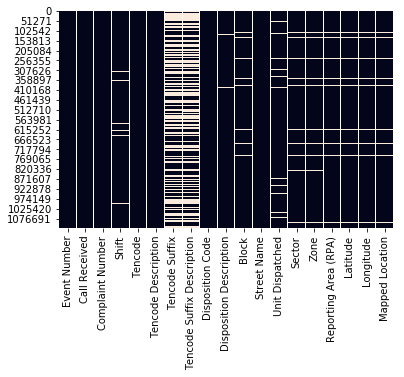

In [38]:
#Checking if data contains Null Values or not

sns.heatmap(police_2016.isnull(), cbar=False)

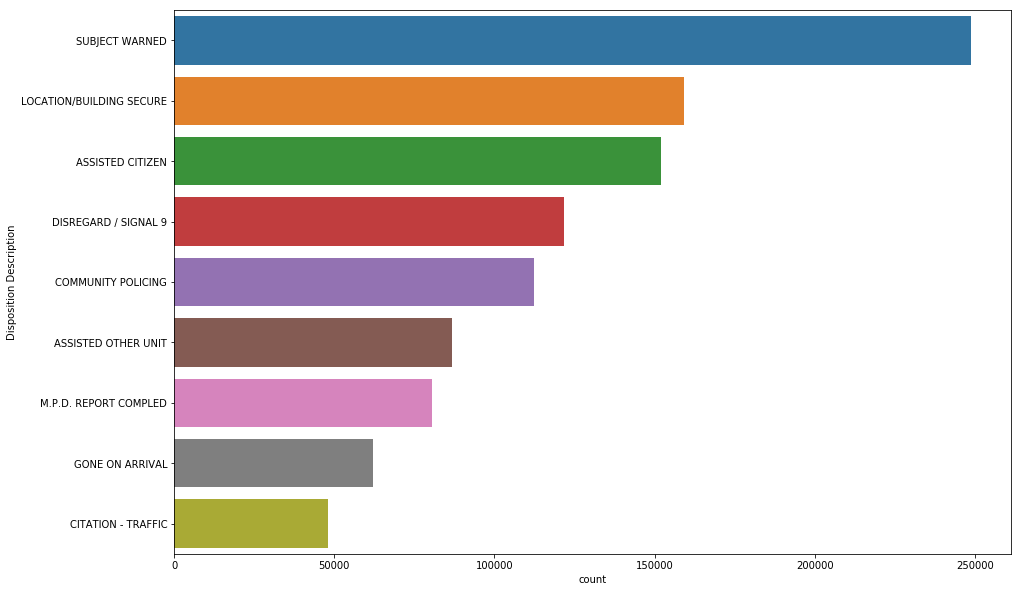

In [40]:
#Disposition Description and its semantics

plt.figure(figsize = (15, 10))
sns.countplot(y= 'Disposition Description', data = police_2016, order = police_2016['Disposition Description'].value_counts().iloc[:9].index)


In [50]:
police_2016.fillna(0, inplace=True)

In [56]:
police_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127959 entries, 0 to 1127958
Data columns (total 19 columns):
Event Number                  1127959 non-null object
Call Received                 1127959 non-null object
Complaint Number              1127959 non-null int64
Shift                         1127959 non-null object
Tencode                       1127959 non-null object
Tencode Description           1127959 non-null object
Tencode Suffix                1127959 non-null object
Tencode Suffix Description    1127959 non-null object
Disposition Code              1127959 non-null int64
Disposition Description       1127959 non-null object
Block                         1127959 non-null float64
Street Name                   1127959 non-null object
Unit Dispatched               1127959 non-null object
Sector                        1127959 non-null object
Zone                          1127959 non-null float64
Reporting Area (RPA)          1127959 non-null float64
Latitude              

In [65]:
import gmaps
from config import gkey

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)



# Store latitude and longitude in locations
locations = police_2016[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
#rating = police_2016["Airport Rating"].astype(float)



rating = police_2016['Mapped Location'].value_counts().iloc[:19].index.astype(float)

fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

#nashville_map_crime = folium.Map(location=[36.133, -86.751],
#                        zoom_start=13,
#                        tiles="CartoDB dark_matter")

#for i in range(500):
#    lat = CR_index['LocationCoord'].iloc[i][0]
#    long = CR_index['LocationCoord'].iloc[i][1]
#    radius = CR_index['ValueCount'].iloc[i] / 45
    
#    if CR_index['ValueCount'].iloc[i] > 1000:
#       color = "#FF4500"
#    else:
#        color = "#008080"
    
#    popup_text = """Latitude : {}<br>
#                Longitude : {}<br>
#                Criminal Incidents : {}<br>"""
#    popup_text = popup_text.format(lat,
#                              long,
#                               CR_index['ValueCount'].iloc[i]
#                               )
#    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

ValueError: weights must be of the same length as locations or None

In [4]:
#3.	How many rows and columns does police_2016 contain?

police_2016.shape

(1048575, 13)

In [13]:
#4.	Keep just these 12 columns: 

keep_cols = ['Event Number', 'Call Received', 'Shift', 'Tencode', 'Tencode Description', 'Disposition Code', 'Disposition Description', 'Sector', 'Zone', 'Unit Dispatched', 'Latitude', 'Longitude']

police_2016_subset = police_2016[keep_cols]

police_2016_subset.columns



Index(['Event Number', 'Call Received', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Sector', 'Zone', 'Unit Dispatched', 'Latitude', 'Longitude'],
      dtype='object')

In [14]:
police_2016.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Tencode Suffix', 'Tencode Suffix Description',
       'Disposition Code', 'Disposition Description', 'Block', 'Street Name',
       'Unit Dispatched', 'Sector', 'Zone', 'Reporting Area (RPA)', 'Latitude',
       'Longitude', 'Mapped Location'],
      dtype='object')

In [15]:
#5.	Rename the columns above:

police_2016_subset = police_2016_subset.rename(columns = {'Event Number' : 'id' , 'Call Received' : 'call_time' , 'Shift' : 'shift' , 'Unit Dispatched': 'unit','Tencode' : 'tencode' , 'Tencode Description' : 'tencode_desc' , 'Disposition Code' : 'disposition' , 'Disposition Description' : 'disposition_desc', 'Sector' : 'sector' , 'Zone' : 'zone' , 'Latitude' : 'lat' , 'Longitude' : 'lng'})

police_2016_subset.columns


Index(['id', 'call_time', 'shift', 'tencode', 'tencode_desc', 'disposition',
       'disposition_desc', 'sector', 'zone', 'unit', 'lat', 'lng'],
      dtype='object')

In [21]:
#6.	Which unit answered the most calls in 2016? How many calls did they answer?

type_counts = police_2016_subset.unit.value_counts()
type_counts = type_counts.to_frame()
type_counts = type_counts.reset_index()
type_counts.iloc[0]
#most_calls = type_counts.loc[type_counts['unit'].idxmax()]
#df.loc[df['Score'].idxmax()]
#most_calls


index    125C
unit     5388
Name: 0, dtype: object

In [22]:
#7.	How many units answered more than 1000 calls in 2016?


GT1000 = type_counts.loc[type_counts['unit'] > 1000]
#df.loc[df['column_name'] == some_value]
GT1000.describe()

#sum(police_2016.units.value_counts()>1000)


,unit
count,374.000000
mean,2332.259358
std,874.110201
min,1001.000000
25%,1568.250000
50%,2253.000000
75%,2980.750000
max,5388.000000


In [24]:
#8.	What tencode description is associated with the greatest number of calls in 2013?

tendesc = police_2016_subset.tencode_desc.value_counts()
tendesc = tendesc.to_frame()
tendesc = tendesc.reset_index()
tendesc = tendesc.rename(columns = {'index' : 'crime' , 'tencode_desc' : 'count'})
tendesc
#tendesc.iloc[0]

,crime,count
0,Traffic Violation,282594
1,Business Check,209057
2,Want Officer for Investigation / Assistance,176549
3,Administrative/Special Assignment,53501
4,Community Policing Activity,51475
5,Vehicle Accident - Property Damage,42396
6,Disorderly Person,39457
7,Suspicious Person,37958
8,Safety Hazard,37327
9,Theft,34156


In [25]:
tendesc.head()


,crime,count
0,Traffic Violation,282594
1,Business Check,209057
2,Want Officer for Investigation / Assistance,176549
3,Administrative/Special Assignment,53501
4,Community Policing Activity,51475


In [26]:
tendesc10 = tendesc.iloc[0:10]
tendesc10

,crime,count
0,Traffic Violation,282594
1,Business Check,209057
2,Want Officer for Investigation / Assistance,176549
3,Administrative/Special Assignment,53501
4,Community Policing Activity,51475
5,Vehicle Accident - Property Damage,42396
6,Disorderly Person,39457
7,Suspicious Person,37958
8,Safety Hazard,37327
9,Theft,34156


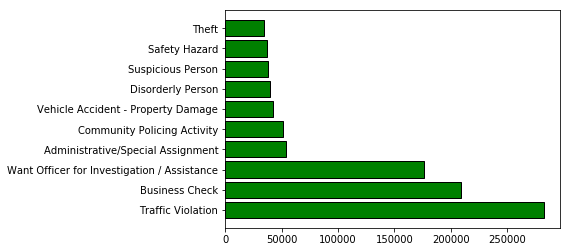

In [27]:
#10.	Make a horizontal barplot of the crime counts.

#?plt.barh

plt.barh('crime', 'count', data=tendesc10, color = 'green', edgecolor = 'black');

#plt.barh('type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

In [28]:
    #2.	Read in police call data for 2017 to a data frame called police_2017 and look at the first 5 rows. 
    #Look at the last five rows of police_2017.

police_2017 = pd.read_csv('Metro_Nashville_Davidson_County_Calls_For_Police_Service__2017_.csv')
police_2017.head()
police_2017.tail()



,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
1105378,PD201701313668,12/31/2017 11:56:00 PM,20171140163,NaN,44,Disorderly Person,P,PROGRESS,4,ASSISTED CITIZEN,0.0,SHELBY AV & I24 E,UTV2,C,13.0,1107.0,36.167,-86.765,"(36.167, -86.765)"
1105379,PD201701313669,12/31/2017 11:57:00 PM,20180000007,NaN,57,Fight / Assault,P,PROGRESS,4,ASSISTED CITIZEN,400.0,BROADWAY,SQUAD,C,21.0,4107.0,36.161,-86.778,"(36.161, -86.778)"
1105380,PD201701313670,12/31/2017 11:58:00 PM,20180000005,NaN,57,Fight / Assault,P,PROGRESS,10,NO RESPONSE,1900.0,DIVISION ST,815C,MT,11.0,6711.0,36.149,-86.797,"(36.149, -86.797)"
1105381,PD201701313671,12/31/2017 11:58:00 PM,20171140167,NaN,40,Suspicious Person,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,4,ASSISTED CITIZEN,5400.0,NOLENSVILLE PKE,834C,MT,35.0,8655.0,36.051,-86.714,"(36.051, -86.714)"
1105382,PD201701313673,12/31/2017 11:59:00 PM,20180000008,NaN,83,Shots Fired,P,PROGRESS,13,FALSE CALL,1300.0,RURAL HILL RD,317C,S,25.0,8861.0,36.056,-86.651,"(36.056, -86.651)"


In [29]:
#3.	How many rows and columns does police_2017 contain?

police_2017.shape

(1105383, 19)

In [30]:
#4.	Keep just these 12 columns: 

keep_cols = ['Event Number', 'Call Received', 'Shift', 'Tencode', 'Tencode Description', 'Disposition Code', 'Disposition Description', 'Sector', 'Zone', 'Unit Dispatched', 'Latitude', 'Longitude']

police_2017_subset = police_2017[keep_cols]

police_2017_subset.columns



Index(['Event Number', 'Call Received', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Sector', 'Zone', 'Unit Dispatched', 'Latitude', 'Longitude'],
      dtype='object')

In [31]:
#5.	Rename the columns above:


police_2017_subset = police_2017_subset.rename(columns = {'Event Number' : 'id' , 'Call Received' : 'call_time' , 'Shift' : 'shift' , 'Unit Dispatched': 'unit','Tencode' : 'tencode' , 'Tencode Description' : 'tencode_desc' , 'Disposition Code' : 'disposition' , 'Disposition Description' : 'disposition_desc', 'Sector' : 'sector' , 'Zone' : 'zone' , 'Latitude' : 'lat' , 'Longitude' : 'lng'})

police_2017_subset.columns


Index(['id', 'call_time', 'shift', 'tencode', 'tencode_desc', 'disposition',
       'disposition_desc', 'sector', 'zone', 'unit', 'lat', 'lng'],
      dtype='object')

In [32]:
#6.	Which unit answered the most calls in 2017? How many calls did they answer?

type_counts = police_2017_subset.unit.value_counts()
type_counts = type_counts.to_frame()
type_counts = type_counts.reset_index()
type_counts.iloc[0]
#most_calls = type_counts.loc[type_counts['unit'].idxmax()]
#df.loc[df['Score'].idxmax()]
#most_calls


index    125C
unit     5746
Name: 0, dtype: object

In [33]:
#7.	How many units answered more than 1000 calls in 2017?


GT1000 = type_counts.loc[type_counts['unit'] > 1000]
#df.loc[df['column_name'] == some_value]
GT1000.describe()

#sum(police_2018.units.value_counts()>1000)


,unit
count,368.000000
mean,2343.000000
std,938.478901
min,1003.000000
25%,1572.750000
50%,2253.000000
75%,2892.250000
max,5746.000000


In [19]:
#8.	What tencode description is associated with the greatest number of calls in 2018?

tendesc = police_2018_subset.tencode_desc.value_counts()
tendesc = tendesc.to_frame()
tendesc = tendesc.reset_index()
tendesc = tendesc.rename(columns = {'index' : 'crime' , 'tencode_desc' : 'count'})
tendesc
#tendesc.iloc[0]

,crime,count
0,Business Check,156142
1,Traffic Violation,143257
2,Want Officer for Investigation / Assistance,126718
3,Administrative/Special Assignment,41765
4,Community Policing Activity,34511
5,Disorderly Person,30139
6,Suspicious Person,28908
7,Vehicle Accident - Property Damage,28134
8,Theft,27392
9,Safety Hazard,25581


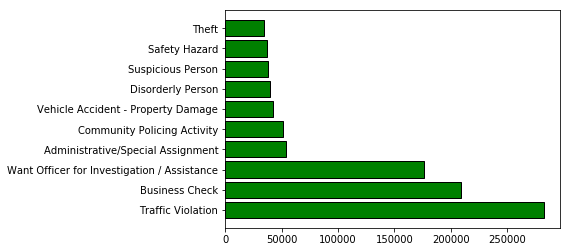

In [34]:
#10.	Make a horizontal barplot of the crime counts.

#?plt.barh

plt.barh('crime', 'count', data=tendesc10, color = 'green', edgecolor = 'black');

#plt.barh('type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

In [21]:
#12.	Since the 2018 data is incomplete, find the latest date for this dataset.  So that comparisons are commensurate, 
#remove rows from the 2013 data that are later than the latest month and day in the 2018 data.


police_2018_subset.head()
#police_2018_subset['call_time'] = pd.to_datetime(police_2018_subset['call_time'])
end_date = police_2018_subset['call_time'].max()
end_date

#'09/21/2018 12:59:58 AM'

police_2013_130921_bool = police_2013_subset['call_time'] <= '09/21/2013 12:59:58 AM'
police_2013_130921 = police_2013_subset.loc[police_2013_130921_bool]
police_2013_130921.tail()

#mask = (df['birth_date'] > start_date) & (df['birth_date'] <= end_date)
#df = df.loc[mask]

pol2013 = police_2013_130921
pol2018 = police_2018_subset




In [22]:
#13.	Create subsets of the 2013 and 2018 police call data that includes these five tencodes:
#•	Holdup / Robbery
#•	Bank Robbery
#•	Burglary – Residence
#•	Burglary - Non-Residence
#•	Theft

pol2013.head()
#pol2018.columns

content_check2013 = pol2013.tencode_desc.value_counts()
content_check2013
content_check2018 = pol2018.tencode_desc.value_counts()
content_check2018

#type_counts = police_2013_subset.unit.value_counts()

#pol2013['tencode_desc']

pol2013_five_bool = pol2013.tencode_desc.isin (['Holdup / Robbery' , 'Bank Robbery' ,'Burglary - Residence' , 'Burglary - Non-Residence' , 'Theft'])
pol2013_five_bool.head()
pol2013_five = pol2013.loc[pol2013_five_bool]
pol2013_five.head()
pol2013_five.tencode_desc.value_counts()
#police_2013_130921 = police_2013_subset.loc[police_2013_130921_bool]
#pol2013_five_count = pol2013_five.tencode_desc.value_counts()
#pol2013_five_count


#Data.loc[[‘Andrade’, ‘Veness’]]



#keep_cols = ['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode', 'Tencode Description', 'Disposition Code', 'Disposition Description', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude', 'Longitude']
#police_2013_subset = police_2013[keep_cols]
#police_2013_subset.columns


pol2018_five_bool = pol2018.tencode_desc.isin (['Holdup / Robbery' , 'Bank Robbery' ,'Burglary - Residence' , 'Burglary - Non-Residence' , 'Theft'])
pol2018_five_bool.head()
pol2018_five = pol2018.loc[pol2018_five_bool]
pol2018_five.head()
pol2018_five.tencode_desc.value_counts()


Theft                       27392
Burglary - Residence        19110
Burglary - Non-Residence    17610
Holdup / Robbery             3118
Bank Robbery                   94
Name: tencode_desc, dtype: int64

In [23]:
#14.	Add a column named ‘year’ to each of these new subset data frames. 
#Set year to 2013 in the 2013 subset and set year to 2018 in the 2018 subset.

pol2013_five2 = pol2013_five
pol2013_five2['year'] = '2013'
pol2013_five2.head()


pol2018_five2 = pol2018_five
pol2018_five2['year'] = '2018'
pol2018_five2.head()



#df['Name'] = 'abc'


C:\Users\Bill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Bill\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng,year
29,PD201800000032,01/01/2018 12:06:00 AM,20180000124,C,50,Theft,5,GONE ON ARRIVAL,811C,MT,13,36.150,-86.813,2018
43,PD201800000048,01/01/2018 12:08:00 AM,20180000351,C,70,Burglary - Residence,10,NO RESPONSE,715C,M,23,36.269,-86.719,2018
51,PD201800000058,01/01/2018 12:12:00 AM,20180000134,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,517C,H,17,36.146,-86.662,2018
58,PD201800000066,01/01/2018 12:13:00 AM,0,C,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,NaN,M,25,36.279,-86.790,2018
87,PD201800000097,01/01/2018 12:20:00 AM,20180000126,C,70,Burglary - Residence,4,ASSISTED CITIZEN,617C,N,13,36.180,-86.816,2018


In [24]:
pol2013_five2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62197 entries, 21 to 900583
Data columns (total 14 columns):
id                  62197 non-null object
call_time           62197 non-null object
complaint_id        62197 non-null int64
shift               60351 non-null object
tencode             62197 non-null int64
tencode_desc        62197 non-null object
disposition         62197 non-null int64
disposition_desc    61948 non-null object
unit                54825 non-null object
sector              62180 non-null object
zone                62180 non-null float64
lat                 62197 non-null float64
lng                 62197 non-null float64
year                62197 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 7.1+ MB


In [25]:
pol2018_five2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67324 entries, 29 to 747315
Data columns (total 14 columns):
id                  67324 non-null object
call_time           67324 non-null object
complaint_id        67324 non-null int64
shift               65348 non-null object
tencode             67324 non-null int64
tencode_desc        67324 non-null object
disposition         67324 non-null int64
disposition_desc    67313 non-null object
unit                58369 non-null object
sector              53254 non-null object
zone                53275 non-null object
lat                 53271 non-null float64
lng                 53271 non-null float64
year                67324 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 7.7+ MB


In [26]:
#15.	Combine the 2013 and 2018 subset data into a single data frame called crimes. Since they have the same columns, 
#you can concatenate the data frames. 
#How many rows and columns are there in the combined data frame?


pol1318 = pd.concat([pol2013_five2, pol2018_five2])
pol1318.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129521 entries, 21 to 747315
Data columns (total 14 columns):
id                  129521 non-null object
call_time           129521 non-null object
complaint_id        129521 non-null int64
shift               125699 non-null object
tencode             129521 non-null int64
tencode_desc        129521 non-null object
disposition         129521 non-null int64
disposition_desc    129261 non-null object
unit                113194 non-null object
sector              115434 non-null object
zone                115455 non-null object
lat                 115468 non-null float64
lng                 115468 non-null float64
year                129521 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 14.8+ MB


In [27]:
#16.	Check the value counts for the tencode description in the crimes data. 
#Using the pandas map function, change the descriptions so there are just three categories: 
#Burglary (includes ‘Burglary - Residence' and 'Burglary - Non-Residence'), 
#Robbery (includes 'Bank Robbery' and 'Holdup / Robbery'), and Theft (includes ‘Theft’). 
#Check the value counts again to confirm your changes.

pol1318.tencode_desc.value_counts()


Theft                       49425
Burglary - Residence        40329
Burglary - Non-Residence    33556
Holdup / Robbery             6025
Bank Robbery                  186
Name: tencode_desc, dtype: int64

In [28]:
#16b - continued
#alt - use map instead of replace

#pol1318['tencode_desc'], replace(['aaa', 'bbb'], 'ccc')
pol1318_3 = pol1318
pol1318_3['tencode_desc']=pol1318_3['tencode_desc'].replace(['Burglary - Residence', 'Burglary - Non-Residence'], 'Burglary')
pol1318_3['tencode_desc']=pol1318_3['tencode_desc'].replace(['Bank Robbery', 'Holdup / Robbery'], 'Robbery')
pol1318_3.tencode_desc.value_counts()


#df['BrandName'].replace(['ABC', 'AB'], 'A')

Burglary    73885
Theft       49425
Robbery      6211
Name: tencode_desc, dtype: int64

In [29]:
pol1318_3.head()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng,year
21,PD201300000031,01/01/2013 12:09:00 AM,20130000057,C,70,Burglary,13,FALSE CALL,137C,W,37,36.056,-86.936,2013
24,PD201300000034,01/01/2013 12:10:00 AM,20130000030,C,71,Burglary,4,ASSISTED CITIZEN,VANDY,S,21,36.105,-86.762,2013
27,PD201300000038,01/01/2013 12:10:00 AM,20130000124,C,70,Burglary,12,LOCATION/BUILDING SECURE,7F80,M,23,36.241,-86.735,2013
78,PD201300000107,01/01/2013 12:30:00 AM,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,C,25,36.160,-86.775,2013
79,PD201300000108,01/01/2013 12:30:00 AM,20130000067,C,70,Burglary,11,DISREGARD / SIGNAL 9,311C,S,21,36.084,-86.748,2013


In [30]:
#17.	Create a data frame called aggregated_df with the year, crime category, and count of calls 
#for the year and category.


#aggregated_df = pol1318_3.tencode_desc.value_counts()
aggregated_pol1318 = pol1318_3
#aggregated_pol1318.groupby(['year', 'tencode_desc']).size()
#aggregated_pol1318
agg_pol1318 = aggregated_pol1318.groupby(['year', 'tencode_desc']).size()
agg_pol1318b = agg_pol1318.reset_index()
agg_pol1318b.head()
agg_pol1318b.columns = ['year', 'tencode_desc', 'count']
agg_pol1318b



,year,tencode_desc,count
0,2013,Burglary,37165
1,2013,Robbery,2999
2,2013,Theft,22033
3,2018,Burglary,36720
4,2018,Robbery,3212
5,2018,Theft,27392


In [36]:
#18.	Plot a Seaborn facet grid to compare the 2013 and 2018 count of crimes for each category. 
#Has any category changed significantly from 2013 to 2018?

g = sns.FacetGrid(agg_pol1318b, col="year", height=4, aspect=1)
g.map(sns.barplot, "tencode_desc", "count");

print('YTD Theft has increased from 2013 to 2018')
print('Burglary and Robbery have not changed significantly')


#plt.figure(figsize = (10, 8))
#sns.set(style="whitegrid")
#sns.barplot('count', 'type', data = type_counts)
#plt.xlabel('')
#plt.ylabel('')
#plt.title('Types of Public Art in Nashville');



NameError: name 'sns' is not defined

In [34]:
#intall folium

!pip install folium

  Using cached https://files.pythonhosted.org/packages/63/36/1c93318e9653f4e414a2e0c3b98fc898b4970e939afeedeee6075dd3b703/branca-0.3.1-py3-none-any.whl


In [37]:
#import folium

import folium

In [38]:
#19.	Which sector had the least number of calls for 2013? How many calls? What about 2018?

agg_pol1318b
#agg_pol1318b.tencode_desc.min()

#agg_pol1318b[['year','tencode_desc']].min()

agg_pol1318b.groupby(['year', 'tencode_desc']).agg('min')


#df.groupby('A').agg('min')



count
year tencode_desc       
2013 Burglary      37165
     Robbery        2999
     Theft         22033
2018 Burglary      36720
     Robbery        3212
     Theft         27392

In [39]:
#23.	Create a folium map of Nashville using [36.1612, -86.7775] as the location to center the map on. 
#Experiment with different values for the zoom_start argument.


nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 11.2
                    )
nash_map

In [40]:
#24.	You have been asked whether more robberies occur near highways. 
#One theory is that robbers rob near highways so that they can make a speedy getaway. 
#As an initial test of this assumption, map the locations of robberies in your crimes data that have 
#a disposition description of ‘GONE ON ARRIVAL’. 
#First create a subset of the data that contains only the rows of interest. 
#Then create a folium map of locations by building a for-loop and using the iterrows() function 
#to create point locations, and map each point as you loop through your dataframe.

pol2018_five_boolrob = pol2018.tencode_desc.isin (['Holdup / Robbery' , 'Bank Robbery'])
pol2018_five_boolrob.head()
pol2018_five_rob = pol2018.loc[pol2018_five_boolrob]
pol2018_five_rob.head()
rob2018 = pol2018_five_rob

rob2018.head()
# keep disposition = 5

rob2018_boolrob = rob2018.disposition.isin ([5])
rob2018_boolrob.head()
disregard2018 = rob2018.loc[rob2018_boolrob]
disregard2018.head()



nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 11.2)


disregard2018.isnull().sum()
disregard2018=disregard2018.dropna(subset = ['lat', 'lng'])


                      
for ind, row in disregard2018.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point).add_to(nash_map)

nash_map.save("folium_2018.html")
                      
#rob2018.head()
                      

#for ind, row in art.iterrows():
#    point = [row['Latitude'], row['Longitude']]
#    folium.Marker(point).add_to(nash_map)


In [ ]:
#24.	for 2013

pol2013_five_boolrob = pol2013.tencode_desc.isin (['Holdup / Robbery' , 'Bank Robbery'])
pol2013_five_boolrob.head()
pol2013_five_rob = pol2013.loc[pol2013_five_boolrob]
pol2013_five_rob.head()
rob2013 = pol2013_five_rob

rob2013.head()
# keep disposition = 5

rob2013_boolrob = rob2013.disposition.isin ([5])
rob2013_boolrob.head()
disregard2013 = rob2013.loc[rob2013_boolrob]
disregard2013.head()



nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 11.2)


disregard2013.isnull().sum()
disregard2013=disregard2013.dropna(subset = ['lat', 'lng'])


                      
for ind, row in disregard2013.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point).add_to(nash_map)

nash_map.save("folium_2013.html")
                      
#rob2018.head()
                      

#for ind, row in art.iterrows():
#    point = [row['Latitude'], row['Longitude']]
#    folium.Marker(point).add_to(nash_map)


In [41]:
#25.	Another theory says that more burglaries occurs on rainy days. 
#Weather data is available in a SQLite database file called weather.db.

db = '../data/weather.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)


NameError: name 'sql' is not defined

In [42]:
mycursor.execute("SELECT * FROM weather2013;")

weather_data_2013 = (mycursor.fetchall())
weather_data_2013

NameError: name 'mycursor' is not defined

In [43]:
weather_2013_df = pd.read_sql_query("SELECT * FROM weather2013;", con)

weather_2013_df.describe()

NameError: name 'con' is not defined

In [44]:
#26.	Plot the unique weather stations on a map. Choose the one you think is closest to the city center. 
#Filter the 2013 weather data to grab only the rows for this station.

weather_2013_df.isnull().sum()
weather_2013_df=weather_2013_df.dropna(subset = ['lat', 'lng'])
weather_2013_df.head()
#unique_sta_2013 = weather_2013_df['name'].unique().tolist()

#unique_sta_2013_df = pd.DataFrame(unique_sta_2013)
#unique_sta_2013_df

unique_stations = weather_2013_df.drop_duplicates(subset=['name'])
unique_stations.describe()

nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 11.2)


unique_stations.isnull().sum()
unique_stations=unique_stations.dropna(subset = ['lat', 'lng'])


                      
for ind, row in unique_stations.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point).add_to(nash_map)

nash_map.save("weather_sta.html")


NameError: name 'weather_2013_df' is not defined

In [45]:
#to find closest stations to Nashville

unique_stations.head()
uniq_compare_lat = unique_stations
uniq_compare_lat.columns

uniq_compare_lat.to_numeric(uniq_compare_lat[lat])


#uniq_compare_lat["lat_dif"] = (36.1612-uniq_compare_lat['lat'])

NameError: name 'unique_stations' is not defined

In [46]:
uniq_compare_lat.info()


NameError: name 'uniq_compare_lat' is not defined

In [47]:
# convert lat and lgn fromn string to numeric, diff for lat and lng, abs value, add, find min